**Import Libraries and Load Dataset**

---



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load dataset
df=pd.read_csv('../content/drive/My Drive/autos.csv', encoding='ISO-8859-1')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


**Exploratory Analysis Data**

---



In [4]:
# Dataset preview
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,3/24/2016 11:52,Golf_3_1.6,privat,Angebot,480.0,test,NaN,1993.0,manuell,0.0,golf,150000,0.0,benzin,volkswagen,NaN,3/24/2016 0:00,0.0,70435.0,4/7/2016 3:16
1,3/24/2016 10:58,A5_Sportback_2.7_Tdi,privat,Angebot,18300.0,test,coupe,2011.0,manuell,190.0,NaN,125000,5.0,diesel,audi,ja,3/24/2016 0:00,0.0,66954.0,4/7/2016 1:46
2,3/14/2016 12:52,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800.0,test,suv,2004.0,automatik,163.0,grand,125000,8.0,diesel,jeep,NaN,3/14/2016 0:00,0.0,90480.0,4/5/2016 12:47
3,3/17/2016 16:54,GOLF_4_1_4__3TÜRER,privat,Angebot,1500.0,test,kleinwagen,2001.0,manuell,75.0,golf,150000,6.0,benzin,volkswagen,nein,3/17/2016 0:00,0.0,91074.0,3/17/2016 17:40
4,3/31/2016 17:25,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600.0,test,kleinwagen,2008.0,manuell,69.0,fabia,90000,7.0,diesel,skoda,nein,3/31/2016 0:00,0.0,60437.0,4/6/2016 10:17


In [5]:
# Number of rows and columns in the dataset
df.shape

(371539, 20)

In [6]:
# Review all column index
df.columns.values

array(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'], dtype=object)

In [7]:
# Data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371539 entries, 0 to 371538
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   dateCrawled          371539 non-null  object 
 1   name                 371539 non-null  object 
 2   seller               371538 non-null  object 
 3   offerType            371538 non-null  object 
 4   price                371538 non-null  float64
 5   abtest               371538 non-null  object 
 6   vehicleType          333669 non-null  object 
 7   yearOfRegistration   371537 non-null  float64
 8   gearbox              351329 non-null  object 
 9   powerPS              371538 non-null  float64
 10  model                351054 non-null  object 
 11  kilometer            371538 non-null  object 
 12  monthOfRegistration  371537 non-null  float64
 13  fuelType             338151 non-null  object 
 14  brand                371537 non-null  object 
 15  notRepairedDamage

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2204dacc90>,
      dtype=object)

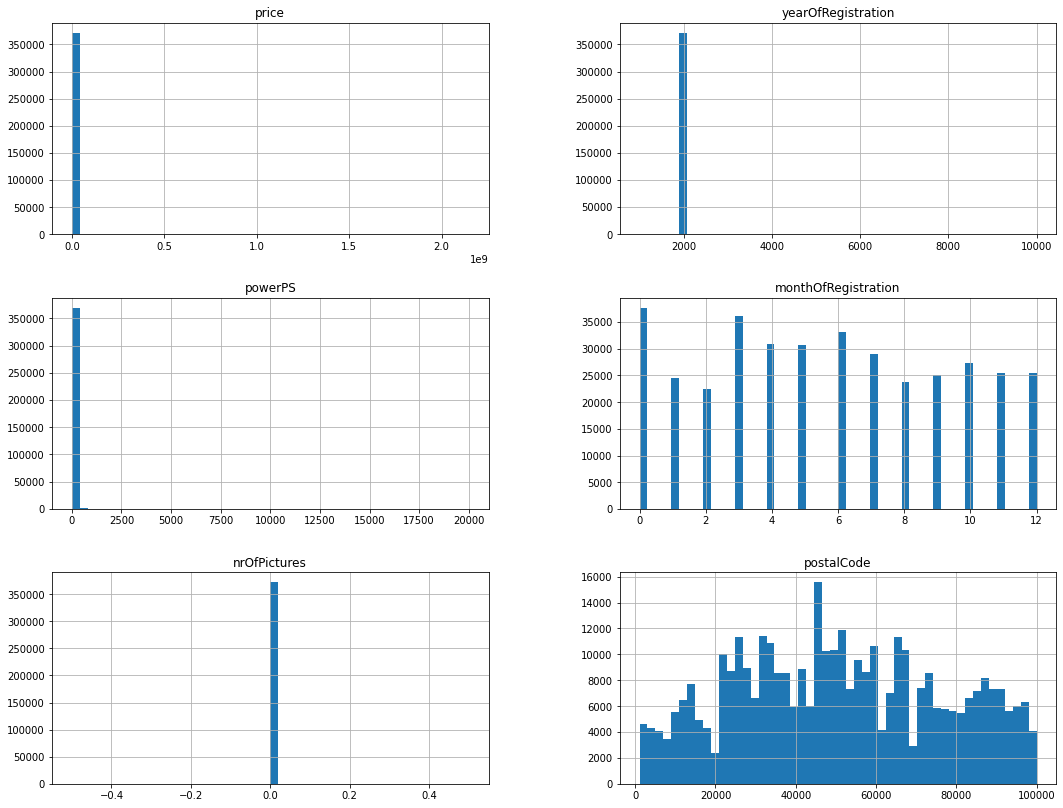

In [8]:
df.hist(bins=50,figsize=(18,14))

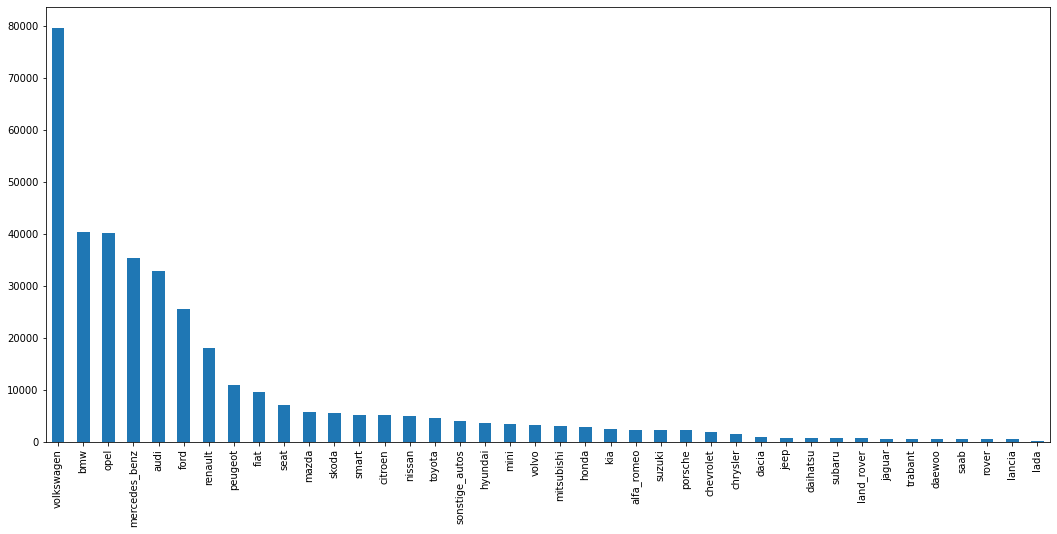

In [9]:
df.brand.value_counts().plot(kind='bar',figsize=(18,8))

**Feature Engineering**
---



Actions for featutres
*   'dateCrawled': delete
*   'name': delete
*   'seller': delete
*   'offerType': delete
*   'price': Remove outlier
*   'abtest': no action
*   'vehicleType': fill NaN according to 'fuelType'
*   'yearOfRegistration': Remove outlier
*   'gearbox': fill NaN according to 'brand'
*   'powerPS': no action
*   'model':fill according to brand
*   'kilometer': no action
*   'monthOfRegistration': delete
*   'fuelType': fill NaN as 'benzin'
*   'brand': no action
*   'notRepairedDamage': fill NaN as 'nein'
*   'dateCreated': delete
*   'nrOfPictures': delete
*   'postalCode': no action
*   'lastSeen': delete
*   'vehicleAge': new created



In [10]:
# Check the numbers of missing values
df.isnull().sum()

dateCrawled                0
name                       0
seller                     1
offerType                  1
price                      1
abtest                     1
vehicleType            37870
yearOfRegistration         2
gearbox                20210
powerPS                    1
model                  20485
kilometer                  1
monthOfRegistration        2
fuelType               33388
brand                      2
notRepairedDamage      72062
dateCreated                2
nrOfPictures               2
postalCode                 2
lastSeen                   2
dtype: int64

In [11]:
# Copy the dataset 
data=df.copy()

**dateCrawled, name**

---


"dateCrawled" is not helpful of model training. Drop this attribute.






In [12]:
data=data.drop(["dateCrawled","name"], axis=1)
data.shape

(371539, 18)

**seller** \

---


We found only 4 out of all 371534 sellers are different. It has less impact for model training.\
Drop this column.

In [13]:
data.seller.value_counts()

privat        371534
gewerblich         3
golf               1
Name: seller, dtype: int64

In [14]:
data=data.drop("seller", axis=1)
data.shape

(371539, 17)

**offerType**

---


We found only 13 out of all 371534 sellers are different.\
Drop this column.

In [15]:
data.offerType.value_counts()

Angebot    371525
Gesuch         12
150000          1
Name: offerType, dtype: int64

In [16]:
data=data.drop("offerType", axis=1)
data.shape

(371539, 16)

**price** \

---

One missing value and some outliers. \
Remove outliers, which price is less than 100 or higher than 10000

In [17]:
df.price.describe()

count    3.715380e+05
mean     1.729544e+04
std      3.587905e+06
min      0.000000e+00
25%      1.150000e+03
50%      2.950000e+03
75%      7.200000e+03
max      2.147484e+09
Name: price, dtype: float64

In [18]:
# Price less than 100
temp1 = df[df.price < 100]
cnt1 = temp1.shape[0]
print("price less than 100: ", cnt1)

# Price higher than 100000
temp2 = df[df.price > 100000]
cnt2 = temp2.shape[0]
print("price higher than 10000: ", cnt2)

data = data[(data.price > 100) & (data.price < 100000)]
print("price between 100 and 1000:", data.shape[0])

price less than 100:  13321
price higher than 10000:  404
price between 100 and 1000: 356775


In [19]:
df.price.isnull().sum()

1

In [20]:
data=data[data.price.isnull() == False]
data.shape

(356775, 16)

**abtest**

---


The data is balanced.

In [21]:
data.abtest.value_counts()

test       184835
control    171940
Name: abtest, dtype: int64

In [22]:
data.abtest.isnull().sum()

0

**fuelType** \

---


Fill the missing value based on highest frequency value "benzin"


In [23]:
data.fuelType.value_counts()

benzin     216137
diesel     105917
lpg          5221
cng           555
hybrid        269
andere        157
elektro        94
Name: fuelType, dtype: int64

In [24]:
data.fuelType.isnull().sum()

28425

In [25]:
data["fuelType"].fillna("benzin",inplace = True)
data.fuelType.isnull().sum()

0

**vehicleType**

---

Base on fuelType values to fill missing data.

In [26]:
data.vehicleType.describe()

count        324191
unique            8
top       limousine
freq          93372
Name: vehicleType, dtype: object

In [27]:
data.vehicleType.value_counts()

limousine     93372
kleinwagen    77216
kombi         65767
bus           29675
cabrio        22403
coupe         18200
suv           14455
andere         3103
Name: vehicleType, dtype: int64

In [28]:
data.vehicleType.isnull().sum()

32584

In [29]:
# Based on fuelType values to fill missing data
data.groupby("fuelType")["vehicleType"].value_counts()

fuelType  vehicleType
andere    limousine         45
          andere            26
          kombi             22
          kleinwagen        21
          suv                9
          bus                8
          cabrio             5
          coupe              1
benzin    kleinwagen     69864
          limousine      64160
          kombi          30129
          cabrio         20298
          coupe          15177
          bus            10526
          suv             5279
          andere          1630
cng       bus              239
          kombi            135
          kleinwagen        77
          limousine         39
          andere            13
          cabrio             3
          coupe              3
          suv                3
diesel    kombi          34306
          limousine      27323
          bus            18381
          suv             8556
          kleinwagen      6687
          coupe           2698
          cabrio          1859
          andere 

In [30]:
# Find the unique name
vehicle = data.vehicleType.unique()
fuel = data.fuelType.unique()
print(vehicle)
print(fuel)

[nan 'coupe' 'suv' 'kleinwagen' 'limousine' 'cabrio' 'bus' 'kombi'
 'andere']
['benzin' 'diesel' 'lpg' 'andere' 'hybrid' 'cng' 'elektro']


In [31]:
# Remove NaN in the ist.
vehicle= np.delete(vehicle,0)
print(vehicle)

['coupe' 'suv' 'kleinwagen' 'limousine' 'cabrio' 'bus' 'kombi' 'andere']


In [32]:
# Find the maximum counts of vehicleType for each fuelType.
# Save into a dictionary. 
d={}
for i in fuel: #['benzin' 'diesel' 'lpg' 'andere' 'hybrid' 'cng' 'elektro']
  value = 0
  for j in vehicle: # ['coupe' 'suv' 'kleinwagen' 'limousine' 'cabrio' 'bus' 'kombi' 'andere']
    if data[(data.fuelType == i) & (data.vehicleType == j)].shape[0] > value:
      value = data[(data.fuelType == i) & (data.vehicleType == j)].shape[0]
      d[i]=j

print(d)


# Assing the vehicleType to the missing value according to the dictionary.
for i in fuel:
    data.loc[(data.fuelType == i) & (data.vehicleType.isnull()) ,"vehicleType" ] = d[i] # df.loc(row,column)

data.vehicleType.isnull().sum()

{'benzin': 'kleinwagen', 'diesel': 'kombi', 'lpg': 'limousine', 'andere': 'limousine', 'hybrid': 'limousine', 'cng': 'bus', 'elektro': 'kleinwagen'}


0

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


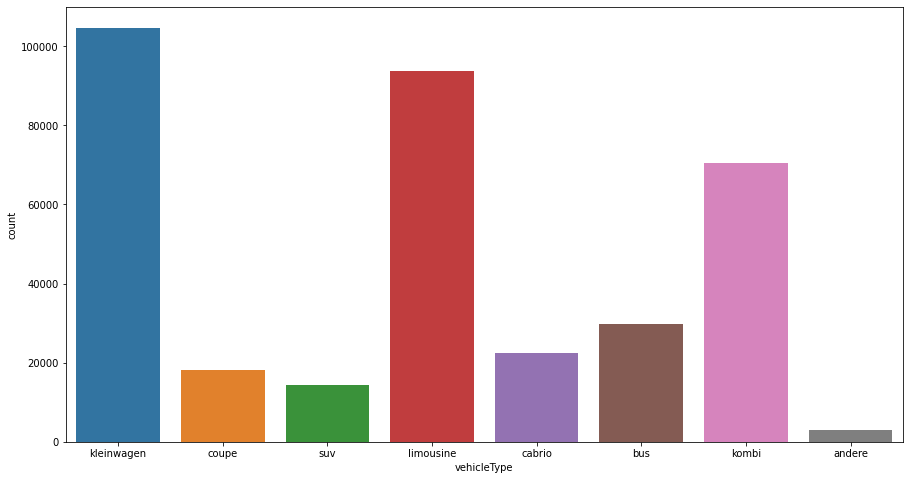

In [33]:
plt.figure(figsize=(15,8))
sns.countplot(data.vehicleType)
#data.vehicleType.value_counts().plot(kind='bar',figsize=(18,8))

In [34]:
# The count of vehicleType "andere" is too small. We combine "andere" and missing data and labeld as "other"
data.vehicleType.value_counts()

kleinwagen    104718
limousine      93696
kombi          70482
bus            29718
cabrio         22403
coupe          18200
suv            14455
andere          3103
Name: vehicleType, dtype: int64

In [35]:
data.shape

(356775, 16)

**yearOfRegistration**

---
Remove outliers which year of registration is before 1950 or after 2019.\
Calculate vehicleAge according to yearOfRegistration and month OfRegistration

In [36]:
data.yearOfRegistration.describe()

count    356775.000000
mean       2004.315972
std          72.332603
min        1000.000000
25%        1999.000000
50%        2004.000000
75%        2008.000000
max        9999.000000
Name: yearOfRegistration, dtype: float64

In [37]:
# Check how many cars are registerd before 1950
old = data[data.yearOfRegistration < 1950]
print(old.shape[0])

# Check how many cars are registerd after 2019
new = data[data.yearOfRegistration > 2019]
print(new.shape[0])

# Remove cars which are  registerd before 1950 or after 2019
data=data[(data.yearOfRegistration > 1950) & (data.yearOfRegistration < 2019)]
data.shape

179
78


(356485, 16)

In [38]:
data.yearOfRegistration.isnull().sum()

0

In [39]:
#data.sort_values(by=['yearOfRegistration']).plot(kind='bar',figsize=(18,8))

**brand**

---



In [40]:
data.brand.describe()

count         356485
unique            40
top       volkswagen
freq           76246
Name: brand, dtype: object

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


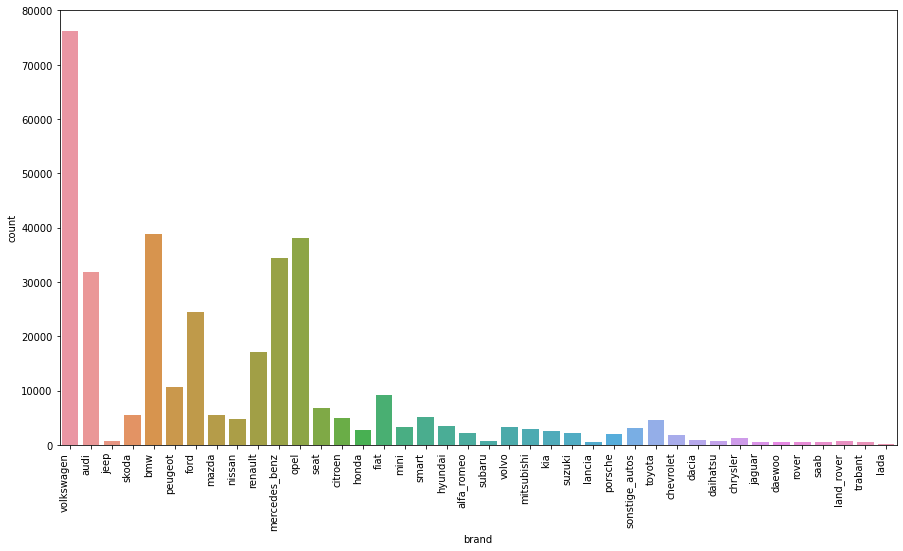

In [41]:
plt.figure(figsize=(15,8))
ax = sns.countplot(data.brand)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.show()

In [42]:
data.brand.isnull().sum()

0

In [43]:
data.shape

(356485, 16)

**gearbox**

---

Fill missing value according to vehicleType

In [44]:
data.gearbox.describe()

count      340231
unique          2
top       manuell
freq       264943
Name: gearbox, dtype: object

In [45]:
data.gearbox.value_counts()

manuell      264943
automatik     75288
Name: gearbox, dtype: int64

In [46]:
data.gearbox.isnull().sum()

16254

In [47]:
# Fill NaN according to brand
data.groupby("brand").gearbox.value_counts()

brand       gearbox  
alfa_romeo  manuell       1994
            automatik      136
audi        manuell      20227
            automatik    10469
bmw         manuell      24562
                         ...  
trabant     automatik        2
volkswagen  manuell      62349
            automatik    10020
volvo       manuell       2154
            automatik      971
Name: gearbox, Length: 80, dtype: int64

In [48]:
# Find the unique name
bd = data.brand.unique()
gbox = data.gearbox.unique()
print(bd)
print(gbox)

['volkswagen' 'audi' 'jeep' 'skoda' 'bmw' 'peugeot' 'ford' 'mazda'
 'nissan' 'renault' 'mercedes_benz' 'opel' 'seat' 'citroen' 'honda' 'fiat'
 'mini' 'smart' 'hyundai' 'alfa_romeo' 'subaru' 'volvo' 'mitsubishi' 'kia'
 'suzuki' 'lancia' 'porsche' 'sonstige_autos' 'toyota' 'chevrolet' 'dacia'
 'daihatsu' 'chrysler' 'jaguar' 'daewoo' 'rover' 'saab' 'land_rover'
 'trabant' 'lada']
['manuell' 'automatik' nan]


In [49]:
# Remove NaN in the ist.
gbox= np.delete(gbox,2)
print(gbox)

['manuell' 'automatik']


In [50]:
# Find the maximum counts of vehicleType for each fuelType.
# Save into a dictionary. 
d={}
for i in bd:
  value = 0
  for j in gbox:
    if data[(data.brand == i) & (data.gearbox == j)].shape[0] > value:
      value = data[(data.brand == i) & (data.gearbox == j)].shape[0]
      d[i]=j

# Assing the vehicleType to the missing value according to the dictionary.
for i in bd:
    data.loc[(data.brand == i) & (data.gearbox.isnull()) ,"gearbox" ] = d[i]

data.gearbox.isnull().sum()

0

In [51]:
data.shape

(356485, 16)

**powerPS**

---

Remove outliers which powerPS less than 10 or greater than 1000

In [52]:
data.powerPS.describe()

count    356485.000000
mean        116.945361
std         189.039823
min           0.000000
25%          75.000000
50%         107.000000
75%         150.000000
max       20000.000000
Name: powerPS, dtype: float64

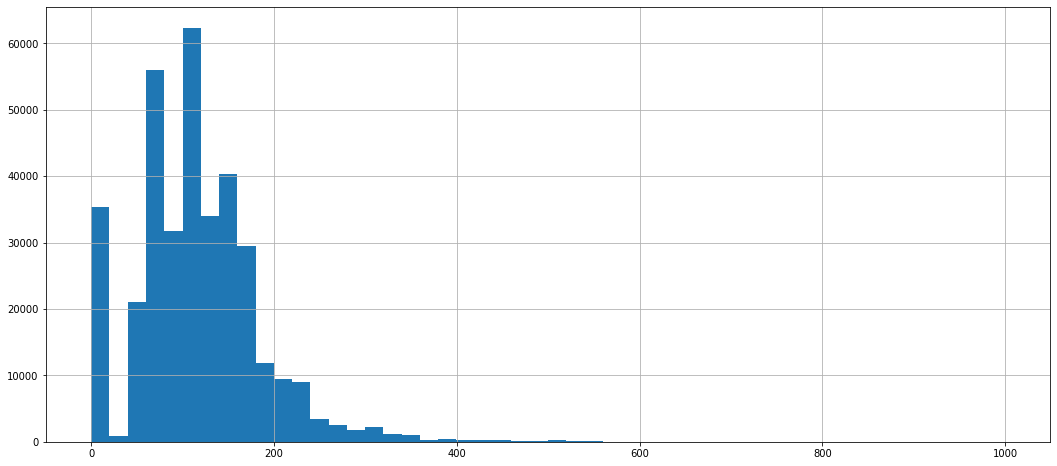

In [53]:
data[data.powerPS < 1000].powerPS.hist(figsize = (18,8), bins=50)

In [54]:
# Check how many cars with powerPS less than 10
slow = data[data.powerPS < 10]
print(slow.shape[0])

# Check how many cars with powerPS greater than 300
fast = data[data.powerPS > 1000]
print(fast.shape[0])

data = data[(data.powerPS > 10) & (data.powerPS < 1000)]
data.shape

35215
278


(320977, 16)

**model**

---

Fill missing value according to brand

In [55]:
data.model.describe()

count     308330
unique       250
top         golf
freq       26651
Name: model, dtype: object

In [56]:
data.model.value_counts()

golf               26651
andere             22427
3er                18489
polo               11028
corsa              10383
                   ...  
samara                 5
kalina                 5
rangerover             5
serie_3                3
discovery_sport        1
Name: model, Length: 250, dtype: int64

In [57]:
data.model.isnull().sum()

12647

In [58]:
# Find the unique name
bd = data.brand.unique()
md = data.model.unique()
print(bd)
print(md)

['audi' 'jeep' 'volkswagen' 'skoda' 'bmw' 'peugeot' 'ford' 'mazda'
 'nissan' 'renault' 'mercedes_benz' 'opel' 'seat' 'citroen' 'honda' 'fiat'
 'mini' 'smart' 'hyundai' 'alfa_romeo' 'subaru' 'volvo' 'mitsubishi' 'kia'
 'suzuki' 'lancia' 'porsche' 'toyota' 'chevrolet' 'dacia' 'daihatsu'
 'chrysler' 'sonstige_autos' 'jaguar' 'daewoo' 'rover' 'saab' 'land_rover'
 'trabant' 'lada']
[nan 'grand' 'golf' 'fabia' '3er' '2_reihe' 'c_max' '3_reihe' 'passat'
 'navara' 'polo' 'twingo' 'a_klasse' 'scirocco' '5er' 'meriva' 'arosa'
 'andere' 'c4' 'civic' 'transporter' 'punto' 'e_klasse' 'clio' 'kadett'
 'one' 'fortwo' '1er' 'b_klasse' 'a8' 'jetta' 'astra' 'fiesta' 'c_klasse'
 'micra' 'vito' 'sprinter' '156' 'escort' 'forester' 'xc_reihe' 'scenic'
 'ka' 'a1' 'focus' 'a4' 'tt' 'a6' 'jazz' 'omega' 'slk' '7er' 'combo'
 'corsa' '80' '147' 'glk' 'z_reihe' 'sportage' 'sorento' 'ibiza' 'mustang'
 'eos' 'touran' 'getz' 'insignia' 'almera' 'megane' 'a3' 'lupo' 'r19'
 'caddy' 'mondeo' 'cordoba' 'colt' 'impreza' 

In [59]:
# Remove NaN in the ist.
md= np.delete(md,0)
print(md)

['grand' 'golf' 'fabia' '3er' '2_reihe' 'c_max' '3_reihe' 'passat'
 'navara' 'polo' 'twingo' 'a_klasse' 'scirocco' '5er' 'meriva' 'arosa'
 'andere' 'c4' 'civic' 'transporter' 'punto' 'e_klasse' 'clio' 'kadett'
 'one' 'fortwo' '1er' 'b_klasse' 'a8' 'jetta' 'astra' 'fiesta' 'c_klasse'
 'micra' 'vito' 'sprinter' '156' 'escort' 'forester' 'xc_reihe' 'scenic'
 'ka' 'a1' 'focus' 'a4' 'tt' 'a6' 'jazz' 'omega' 'slk' '7er' 'combo'
 'corsa' '80' '147' 'glk' 'z_reihe' 'sportage' 'sorento' 'ibiza' 'mustang'
 'eos' 'touran' 'getz' 'insignia' 'almera' 'megane' 'a3' 'lupo' 'r19'
 'caddy' 'mondeo' 'cordoba' 'colt' 'impreza' 'vectra' 'berlingo'
 'm_klasse' 'tiguan' 'i_reihe' '6_reihe' 'panda' 'up' 'ceed' 'kangoo'
 '5_reihe' 'yeti' 'octavia' 'zafira' 'mii' 'rx_reihe' '6er' 'modus' 'fox'
 'matiz' 'beetle' 'rio' 'touareg' 'logan' 'spider' 'cuore' 's_max' 'a2'
 'x_reihe' 'a5' 'galaxy' 'c3' 'viano' 's_klasse' '1_reihe' 'sharan'
 'avensis' 'sl' 'roomster' 'q5' 'kaefer' 'santa' 'leon' 'cooper' '4_reihe'
 'lag

In [60]:
# Check if any of brand doesn't have any model value.
l=[]
for i in bd:
  temp = data[data.brand == i]
  if temp.model.isnull().sum() == temp.shape[0]:
    data.loc[data.brand == i ,"model" ] = 'others'
    l.append(i)
print(l)

['sonstige_autos']


In [61]:
data[data.brand == 'sonstige_autos'].head()

,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
690,9900.0,test,suv,2000.0,automatik,250.0,others,150000,4.0,lpg,sonstige_autos,nein,4/1/2016 0:00,0.0,17309.0,4/7/2016 14:56
729,6999.0,test,limousine,2010.0,automatik,186.0,others,125000,4.0,benzin,sonstige_autos,nein,3/30/2016 0:00,0.0,81929.0,4/5/2016 11:18
1030,500.0,control,limousine,2010.0,manuell,101.0,others,70000,1.0,benzin,sonstige_autos,ja,3/15/2016 0:00,0.0,76829.0,3/21/2016 14:15
1148,11500.0,control,bus,1985.0,automatik,160.0,others,125000,10.0,benzin,sonstige_autos,NaN,3/6/2016 0:00,0.0,4849.0,4/5/2016 18:17
1156,9200.0,control,limousine,2005.0,automatik,249.0,others,150000,10.0,benzin,sonstige_autos,nein,3/22/2016 0:00,0.0,95447.0,4/5/2016 23:16


In [62]:
md = data.model.unique()
md = np.delete(md,0)

In [63]:
# Find the maximum counts of model for each brand.
# Save into a dictionary. 
d={}
for i in bd:
  value = 0
  for j in md:
    if data[(data.brand == i) & (data.model == j)].shape[0] > value:
      value = data[(data.brand == i) & (data.model == j)].shape[0]
      d[i]=j

# Assing the model to the missing value according to the dictionary.
for i in bd:
    data.loc[(data.brand == i) & (data.model.isnull()) ,"model" ] = d[i]

data.model.isnull().sum()

0

In [64]:
# data.model.fillna('golf',inplace = True)

In [65]:
data.shape

(320977, 16)

**kilometer**

---



In [66]:
data.kilometer.describe()

count     320977
unique        26
top       150000
freq      186845
Name: kilometer, dtype: int64

In [67]:
data.kilometer.value_counts()

150000    186845
125000     31233
150000     18213
100000     12849
90000      10495
80000       9300
70000       8343
60000       7420
50000       6524
40000       5471
30000       5041
20000       4547
5000        3150
125000      3060
10000       1456
100000      1246
90000        975
80000        922
70000        753
60000        712
50000        591
40000        506
30000        468
20000        417
5000         294
10000        146
Name: kilometer, dtype: int64

In [68]:
data=data[data.kilometer != '3/30/2016 0:44']
data.kilometer.isnull().sum()

0

**monthOfRegistration**

---

Calculate vehicleAge according to yearOfRegistration and month OfRegistration.

In [69]:
data.monthOfRegistration.describe()

count    320977.000000
mean          5.987149
std           3.583675
min           0.000000
25%           3.000000
50%           6.000000
75%           9.000000
max          12.000000
Name: monthOfRegistration, dtype: float64

In [70]:
data.monthOfRegistration.value_counts()

3.0     32894
6.0     29904
4.0     28044
5.0     27656
7.0     26086
10.0    24714
11.0    22896
12.0    22848
9.0     22660
1.0     21895
8.0     21346
2.0     20399
0.0     19635
Name: monthOfRegistration, dtype: int64

In [71]:
# Convert month 0 to random month number
data['Random'] = np.random.randint(1,12,size=(len(data),1))
data.loc[data.monthOfRegistration == 0, "monthOfRegistration"] = data.loc[data.monthOfRegistration == 0, "Random"]
data.monthOfRegistration.value_counts()

data = data.drop("Random", axis=1)

In [72]:
data.monthOfRegistration.value_counts()

3.0     34783
6.0     31647
4.0     29794
5.0     29403
7.0     27842
10.0    26525
11.0    24677
9.0     24451
1.0     23671
8.0     23107
12.0    22848
2.0     22229
Name: monthOfRegistration, dtype: int64

In [73]:
data.monthOfRegistration.isnull().sum()

0

In [74]:
# Create a new column "monthOfUsage"
import datetime
now = datetime.datetime.now()
data['vehicleAge'] = ((now.year * 12 + now.month) - (data.yearOfRegistration * 12 + data.monthOfRegistration))

In [75]:
data = data.drop(['yearOfRegistration'],axis=1)

In [76]:
data.shape

(320977, 16)

**notRepairedDamage**

---



In [77]:
data.notRepairedDamage.value_counts()

nein    244767
ja       29229
Name: notRepairedDamage, dtype: int64

In [78]:
data.notRepairedDamage.isnull().sum()

46981

In [79]:
# Fill NaN as 'nein'
data.loc[data.notRepairedDamage.isnull() == True, "notRepairedDamage"] = 'nein'
data.notRepairedDamage.isnull().sum()

0

In [80]:
data.notRepairedDamage.value_counts()

nein    291748
ja       29229
Name: notRepairedDamage, dtype: int64

In [81]:
data.shape

(320977, 16)

**dateCreated**

---

Not helpful of model traing. Drop it

In [82]:
data=data.drop('dateCreated',axis=1)
data.shape

(320977, 15)

**nrOfPictures**

---

Not helpful of model traing. Drop it

In [83]:
data.nrOfPictures.describe()

count    320977.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: nrOfPictures, dtype: float64

In [84]:
data=data.drop('nrOfPictures',axis=1)
data.shape

(320977, 14)

**postalCode**

---



In [85]:
data.postalCode.describe()

count    320977.000000
mean      51482.167685
std       25766.975852
min        1067.000000
25%       31139.000000
50%       50676.000000
75%       72336.000000
max       99998.000000
Name: postalCode, dtype: float64

In [86]:
data.shape

(320977, 14)

**lastSeen**

---

Not helpful of model traing. Drop it

In [87]:
data=data.drop('lastSeen',axis=1)
data.shape

(320977, 13)

**Cleaning Data Check**

---



In [88]:
# Review all column index
data.columns.values

array(['price', 'abtest', 'vehicleType', 'gearbox', 'powerPS', 'model',
       'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'postalCode', 'vehicleAge'], dtype=object)

In [89]:
data.head()

,price,abtest,vehicleType,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,postalCode,vehicleAge
1,18300.0,test,coupe,manuell,190.0,a4,125000,5.0,diesel,audi,ja,66954.0,125.0
2,9800.0,test,suv,automatik,163.0,grand,125000,8.0,diesel,jeep,nein,90480.0,206.0
3,1500.0,test,kleinwagen,manuell,75.0,golf,150000,6.0,benzin,volkswagen,nein,91074.0,244.0
4,3600.0,test,kleinwagen,manuell,69.0,fabia,90000,7.0,diesel,skoda,nein,60437.0,159.0
5,650.0,test,limousine,manuell,102.0,3er,150000,10.0,benzin,bmw,ja,33775.0,312.0


In [90]:
# Save clean data into CSV file
data.to_csv('autos_clean.csv',index= False)

In [91]:
# Read CSV file
data = pd.read_csv('autos_clean.csv')

## Model Training and Evaluation ##

**Convert Data Type**

---





In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320977 entries, 0 to 320976
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   price                320977 non-null  float64
 1   abtest               320977 non-null  object 
 2   vehicleType          320977 non-null  object 
 3   gearbox              320977 non-null  object 
 4   powerPS              320977 non-null  float64
 5   model                320977 non-null  object 
 6   kilometer            320977 non-null  int64  
 7   monthOfRegistration  320977 non-null  float64
 8   fuelType             320977 non-null  object 
 9   brand                320977 non-null  object 
 10  notRepairedDamage    320977 non-null  object 
 11  postalCode           320977 non-null  float64
 12  vehicleAge           320977 non-null  float64
dtypes: float64(5), int64(1), object(7)
memory usage: 31.8+ MB


In [93]:
data['price'] = data.price.astype(int)
data['powerPS'] = data.powerPS.astype(int)
data['kilometer'] = data.kilometer.astype(int)
data['postalCode'] = data.kilometer.astype(str)
data['vehicleAge'] = data.kilometer.astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320977 entries, 0 to 320976
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   price                320977 non-null  int64  
 1   abtest               320977 non-null  object 
 2   vehicleType          320977 non-null  object 
 3   gearbox              320977 non-null  object 
 4   powerPS              320977 non-null  int64  
 5   model                320977 non-null  object 
 6   kilometer            320977 non-null  int64  
 7   monthOfRegistration  320977 non-null  float64
 8   fuelType             320977 non-null  object 
 9   brand                320977 non-null  object 
 10  notRepairedDamage    320977 non-null  object 
 11  postalCode           320977 non-null  object 
 12  vehicleAge           320977 non-null  int64  
dtypes: float64(1), int64(4), object(8)
memory usage: 31.8+ MB


In [94]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
columns = ['abtest', 'vehicleType', 'gearbox','model', 'fuelType', 'brand','notRepairedDamage','postalCode']
le = LabelEncoder()
data[columns] = data[columns].apply(lambda x: le.fit_transform(x))

data.head()

,price,abtest,vehicleType,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,postalCode,vehicleAge
0,18300,1,3,1,190,29,125000,5.0,3,1,0,2,125000
1,9800,1,7,0,163,119,125000,8.0,3,14,1,2,125000
2,1500,1,4,1,75,118,150000,6.0,1,38,1,3,150000
3,3600,1,4,1,69,103,90000,7.0,3,31,1,12,90000
4,650,1,6,1,102,11,150000,10.0,1,2,0,3,150000


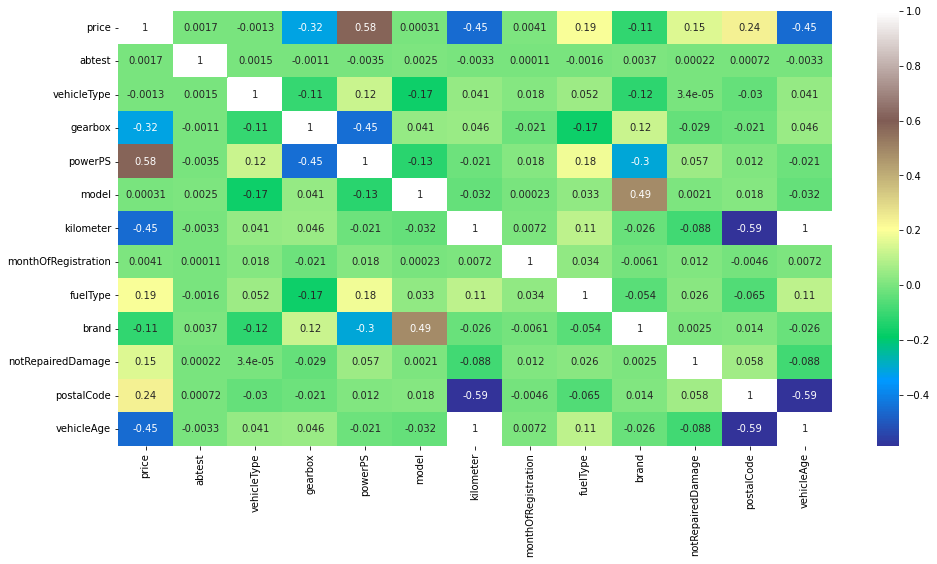

In [95]:
plt.figure(figsize=(16,8))
sns.heatmap(data.corr(), annot=True,cmap="terrain", )

In [96]:
# Normalization
def normalize(dataset,columns):
    for c in columns:
      dataset[c]=((dataset[c]-dataset[c].min())/(dataset[c].max()-dataset[c].min()))
    return dataset

columns = ['powerPS','kilometer','vehicleAge']
data= normalize(data,columns)

data.head()

,price,abtest,vehicleType,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,postalCode,vehicleAge
0,18300,1,3,1,0.181174,29,0.827586,5.0,3,1,0,2,0.827586
1,9800,1,7,0,0.153846,119,0.827586,8.0,3,14,1,2,0.827586
2,1500,1,4,1,0.064777,118,1.000000,6.0,1,38,1,3,1.000000
3,3600,1,4,1,0.058704,103,0.586207,7.0,3,31,1,12,0.586207
4,650,1,6,1,0.092105,11,1.000000,10.0,1,2,0,3,1.000000


In [97]:
# Data Type Converting for One Hot Encoding
def typeconverter(dataset,columns,type='str'):
    for c in columns:
      dataset[c]=dataset[c].astype(type)
    return dataset

columns = ['abtest','vehicleType','gearbox','model','fuelType','brand','notRepairedDamage']
data=typeconverter(data,columns,str)

# One Hot Encoding
data= pd.get_dummies(data)

In [98]:
data.head()

,price,powerPS,kilometer,monthOfRegistration,postalCode,vehicleAge,abtest_0,abtest_1,vehicleType_0,vehicleType_1,vehicleType_2,vehicleType_3,vehicleType_4,vehicleType_5,vehicleType_6,vehicleType_7,gearbox_0,gearbox_1,model_0,model_1,model_10,model_100,model_101,model_102,model_103,model_104,model_105,model_106,model_107,model_108,model_109,model_11,model_110,model_111,model_112,model_113,model_114,model_115,model_116,model_117,...,brand_10,brand_11,brand_12,brand_13,brand_14,brand_15,brand_16,brand_17,brand_18,brand_19,brand_2,brand_20,brand_21,brand_22,brand_23,brand_24,brand_25,brand_26,brand_27,brand_28,brand_29,brand_3,brand_30,brand_31,brand_32,brand_33,brand_34,brand_35,brand_36,brand_37,brand_38,brand_39,brand_4,brand_5,brand_6,brand_7,brand_8,brand_9,notRepairedDamage_0,notRepairedDamage_1
0,18300,0.181174,0.827586,5.0,2,0.827586,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,9800,0.153846,0.827586,8.0,2,0.827586,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,1500,0.064777,1.000000,6.0,3,1.000000,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,3600,0.058704,0.586207,7.0,12,0.586207,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,650,0.092105,1.000000,10.0,3,1.000000,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


**Split Dataset**


---



In [99]:
from sklearn.model_selection import train_test_split
X= data.drop(['price','postalCode'], axis=1)
y =data['price']

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=1)

**Linear Regression**


---



In [100]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error 
from math import sqrt

model = LinearRegression().fit(X_train, y_train)
y_pred = model.predict(X_test)
error = sqrt(mean_squared_error(y_test,y_pred))

print('RMSE:',error)

# R^2 = 1- ((y_true - y_pred) ** 2).sum() / (y_true - y_true.mean()) ** 2).sum()
print('R^2:', model.score(X_test, y_test))

# y = ax+b where a is coefficient and b is intercept
print('Intercept:', model.intercept_)
print('Coefficient:',model.coef_)

RMSE: 4296.7458405685375
R^2: 0.6768712419515176
Intercept: -306063210411003.2
Coefficient: [ 5.68453036e+04  1.83226585e+14 -1.62928672e+01 -1.83226585e+14
  4.09628426e+14  4.09628426e+14 -2.73985018e+13 -2.73985018e+13
 -2.73985018e+13 -2.73985018e+13 -2.73985018e+13 -2.73985018e+13
 -2.73985018e+13 -2.73985018e+13 -3.03223709e+13 -3.03223709e+13
  3.83979635e+11  3.83979640e+11  3.83979641e+11  3.83979641e+11
  3.83979638e+11  3.83979643e+11  3.83979642e+11  3.83979643e+11
  3.83979642e+11  3.83979641e+11  3.83979642e+11  3.83979641e+11
  3.83979641e+11  3.83979632e+11  3.83979637e+11  3.83979643e+11
  3.83979654e+11  3.83979639e+11  3.83979642e+11  3.83979643e+11
  3.83979657e+11  3.83979649e+11  3.83979641e+11  3.83979641e+11
  3.83979640e+11  3.83979638e+11  3.83979643e+11  3.83979642e+11
  3.83979639e+11  3.83979643e+11  3.83979642e+11  3.83979641e+11
  3.83979643e+11  3.83979644e+11  3.83979639e+11  3.83979642e+11
  3.83979642e+11  3.83979640e+11  3.83979644e+11  3.83979639e+1

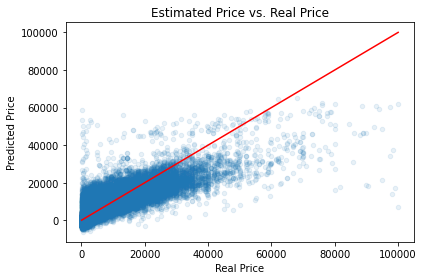

In [101]:
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred, s=20,alpha=0.1)
plt.title('Estimated Price vs. Real Price')
plt.xlabel('Real Price')
plt.ylabel('Predicted Price')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r')
plt.tight_layout()

**KNN**

---



In [102]:
from sklearn import neighbors

# Checnk K from 1 to 4
rmse_val = []
for K in range(4):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
    model.fit(X_train, y_train) 
    y_pred=model.predict(X_test)
    error = sqrt(mean_squared_error(y_test,y_pred))
    rmse_val.append(error)
    print('RMSE value for k= ' , K , 'is:', error)

print('\nWhen k is',rmse_val.index(min(rmse_val))+1, 'we can get minimum RMSE:', min(rmse_val))    

RMSE value for k=  1 is: 5103.704188894699
RMSE value for k=  2 is: 4643.09432774577
RMSE value for k=  3 is: 4530.444503828759
RMSE value for k=  4 is: 4477.779823046531

When k is 4 we can get minimum RMSE: 4477.779823046531


https://www.youtube.com/watch?v=3lp5CmSwrHI

**Random Forest Regression**


---
https://www.youtube.com/results?search_query=Random+Forest+Regression \
https://botbark.com/2020/01/05/visualize-or-print-random-forest-algorithm-model/


In [103]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=10)
rfr.fit(X_train, y_train)
rfr.score(X_test, y_test)

0.8149925090267927

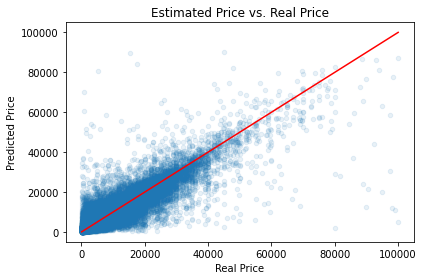

In [104]:
y_pred= rfr.predict(X_test)

plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred, s=20,alpha=0.1)
plt.title('Estimated Price vs. Real Price')
plt.xlabel('Real Price')
plt.ylabel('Predicted Price')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r')
plt.tight_layout()

**Deep Learing**

In [105]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [106]:
from sklearn.model_selection import train_test_split
X= data.drop(['price','postalCode'], axis=1)
y =data['price']

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=1)

In [107]:
from tensorflow.keras import backend as K
from keras.losses import mean_squared_error

def root_mean_squared_error(y_true, y_pred):
    return K.sqrt(mean_squared_error(y_true, y_pred))

In [108]:
input_num = X_train.shape[1]

model = Sequential()
model.add(Dense(input_num,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='Adam',loss= root_mean_squared_error)

In [109]:
model.fit(x=X_train,y=y_train, validation_data=(X_test,y_test), batch_size=10,epochs=10)
model.summary()

Epoch 1/10
24074/24074 [==============================] - 100s 4ms/step - loss: 2695.5044 - val_loss: 2248.5298
Epoch 2/10
24074/24074 [==============================] - 95s 4ms/step - loss: 2216.4509 - val_loss: 2146.0979
Epoch 3/10
24074/24074 [==============================] - 95s 4ms/step - loss: 2154.7766 - val_loss: 2106.8398
Epoch 4/10
24074/24074 [==============================] - 86s 4ms/step - loss: 2126.4731 - val_loss: 2090.0771
Epoch 5/10
24074/24074 [==============================] - 94s 4ms/step - loss: 2107.5437 - val_loss: 2070.2651
Epoch 6/10
24074/24074 [==============================] - 84s 3ms/step - loss: 2092.0510 - val_loss: 2060.0725
Epoch 7/10
24074/24074 [==============================] - 92s 4ms/step - loss: 2079.3625 - val_loss: 2046.7417
Epoch 8/10
24074/24074 [==============================] - 88s 4ms/step - loss: 2069.3123 - val_loss: 2040.3616
Epoch 9/10
24074/24074 [==============================] - 86s 4ms/step - loss: 2059.5522 - val_loss: 2032.3643


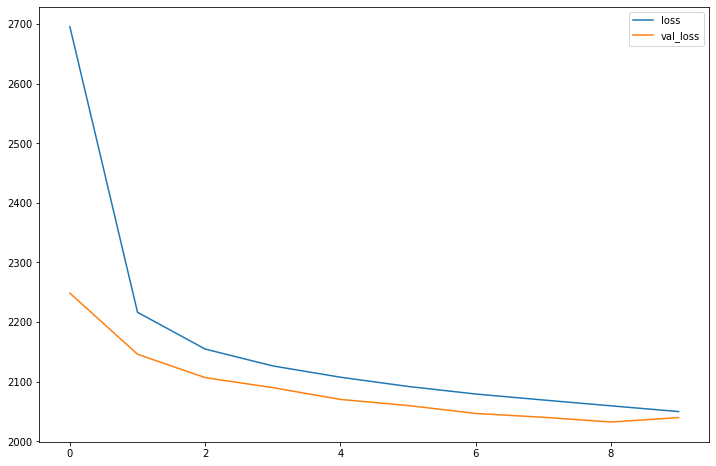

In [110]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot(figsize=(12,8))

MAE: 2039.8473583609525
MSE: 14245431.303293275
RMSE: 3774.3120304624094
VarScore: 0.7568684638419455


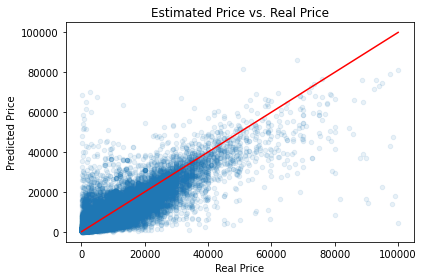

In [113]:
y_pred = model.predict(X_test)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('VarScore:',metrics.explained_variance_score(y_test,y_pred))
# Visualizing Our predictions
fig = plt.figure(figsize=(6,4))
plt.scatter(y_test,y_pred, s=20,alpha=0.1)
plt.title('Estimated Price vs. Real Price')
plt.xlabel('Real Price')
plt.ylabel('Predicted Price')
# Perfect predictions
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r')
plt.tight_layout()

**Reference**


---



* https://www.kaggle.com/milosev/randomforestregressor-test-0-93  
* https://www.kaggle.com/aditya094/used-car-prediction-with-82-accuracy



